In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

In [4]:
# 차원축소
del data['chas'] #범주형 데이터 제거
medv = data['medv']; del data['medv'] #나중에 비교를 위한 medv컬럼도 복사 후 제거

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 정규화진행
scaler = StandardScaler() #객체생성
scaler.fit(data) #데이터학습
scaler_data = scaler.transform(data) #변환

## 차원축소
pca = PCA(n_components=2) #객체생성
pca.fit(scaler_data) #PCA학습시키기
pca.transform(scaler_data) #결과값 확인 

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [5]:
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1','pc2']) #데이터프레임으로 변환
data2

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919
...,...,...
501,-0.313721,-1.143840
502,-0.109236,-1.326699
503,-0.311283,-1.395246
504,-0.269391,-1.350590


In [6]:
from sklearn.cluster import KMeans

In [7]:
x = [] # k가 몇개인지
y = [] # 응집도가 몇인지

for k in range(1,30):
    kmeans = KMeans(n_clusters = k) #k개의 군집화를 하겠다는 객체생성
    kmeans.fit(data2) #학습시키기
    
    x.append(k)
    y.append(kmeans.inertia_) #학습된 KMeans의 응집도 확인 (각 데이터로부터 속한 군집의 중심까지의 거리, 낮을수록 군집화 잘되어있는 것)
    

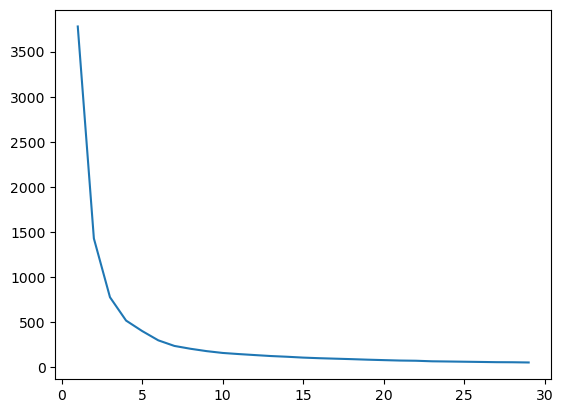

In [8]:
# 그래프 그리기
plt.plot(x,y) # 결과 => 3또는4 가 elbow point

In [9]:
# ELBOW POINT를 4로 지정 후 클러스터링 시작
kmeans = KMeans(n_clusters=4)
kmeans.fit(data2)

KMeans(n_clusters=4)

In [10]:
data2['labels'] = kmeans.predict(data2) #학습된 데이터를 바탕으로 데이터를 변환
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,3
1,-1.456003,-0.947694,3
2,-2.073454,-0.625336,3
3,-2.610161,-0.134044,3
4,-2.456866,-0.229919,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

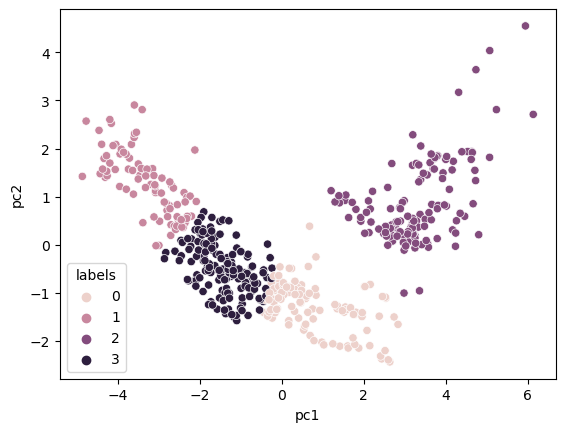

In [11]:
sns.scatterplot(data=data2, x='pc1', y='pc2', hue='labels')

# 클러스터링 결과 해석하기 

In [12]:
# 가장 먼저 어떤 그룹이 집 값이 높은지 평균 비교
#medv컬럼 추가
data2['medv'] = medv
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,3,24.0
1,-1.456003,-0.947694,3,21.6
2,-2.073454,-0.625336,3,34.7
3,-2.610161,-0.134044,3,33.4
4,-2.456866,-0.229919,3,36.2


In [13]:
#그룹0의 medv값 평균
data2[data2['labels']==0]['medv'].mean()

19.733333333333324

In [14]:
#시각화를 위해 각 그룹별 medv값 평균을 따로 변수로 생성
medv_0 = data2[data2['labels']==0]['medv'].mean()
medv_1 = data2[data2['labels']==1]['medv'].mean()
medv_2 = data2[data2['labels']==2]['medv'].mean()
medv_3 = data2[data2['labels']==3]['medv'].mean()

<AxesSubplot:>

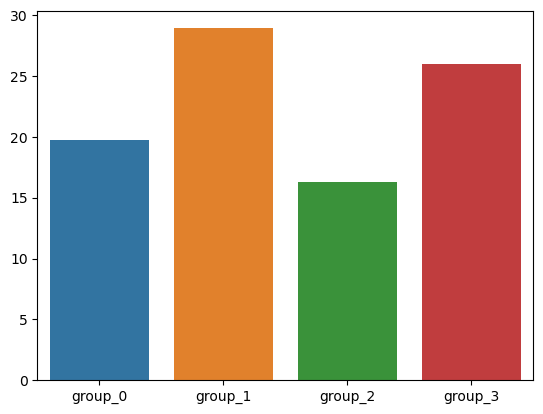

In [15]:
sns.barplot(x=['group_0','group_1','group_2','group_3'], y=[medv_0,medv_1,medv_2,medv_3])

# 그룹들의 특징
### 최상위층 - 2번그룸
### 최하위층 - 0번그룹 

In [16]:
#원본데이터에 라벨을 복제
data['labels']=data2['labels']

In [17]:
#각 그룹의 데이터를 나누어서 변수에 담기
group = data[(data['labels']==0)|(data['labels']==2)]

In [18]:
group = group.groupby('labels').mean().reset_index()
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0,0.879126,0.109649,15.179298,0.610825,5.996711,89.032456,2.573284,4.438596,370.192982,18.435965,362.132105,15.720439
1,2,12.571770,0.000000,18.243881,0.671470,6.010679,89.929851,2.057190,23.701493,666.671642,20.198507,288.733209,18.723358


<AxesSubplot:xlabel='labels', ylabel='zn'>

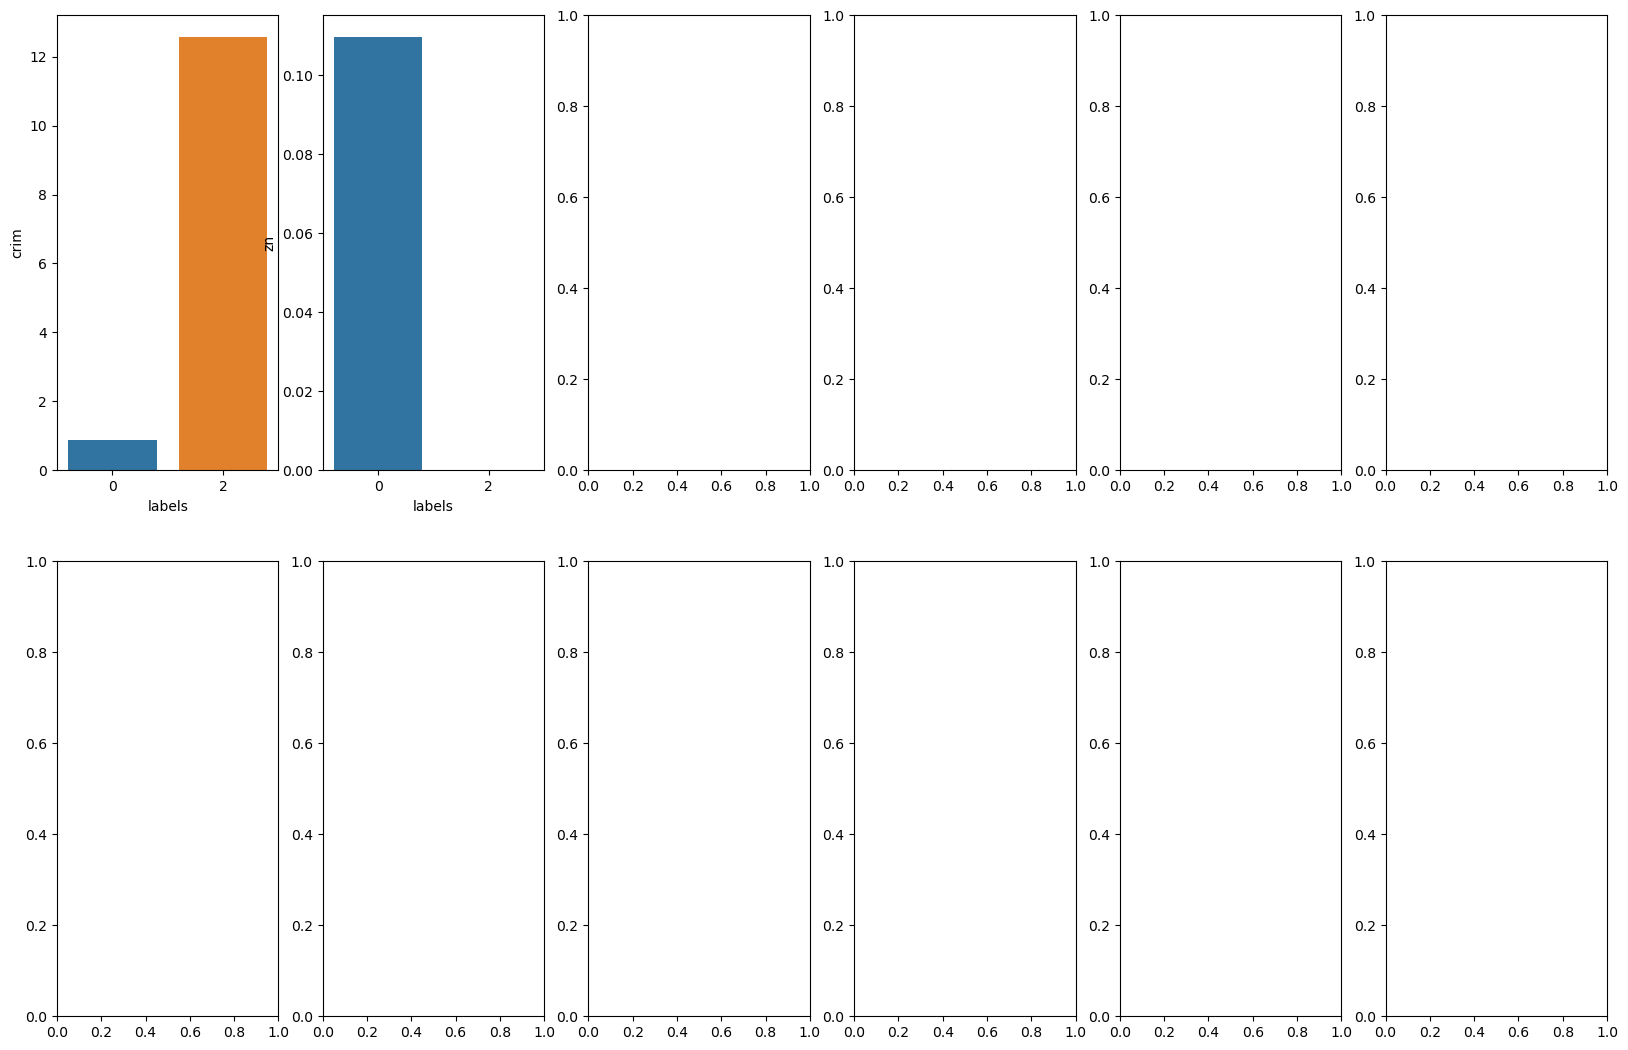

In [19]:
# plt.subplots(행,열,figsize=()) : 여러가지의 그림을 그리는 방법
f, ax = plt.subplots(2,6, figsize=(20,13))

sns.barplot(x='labels',y='crim', data=group, ax=ax[0,0])
sns.barplot(x='labels',y='zn', data=group, ax=ax[0,1])

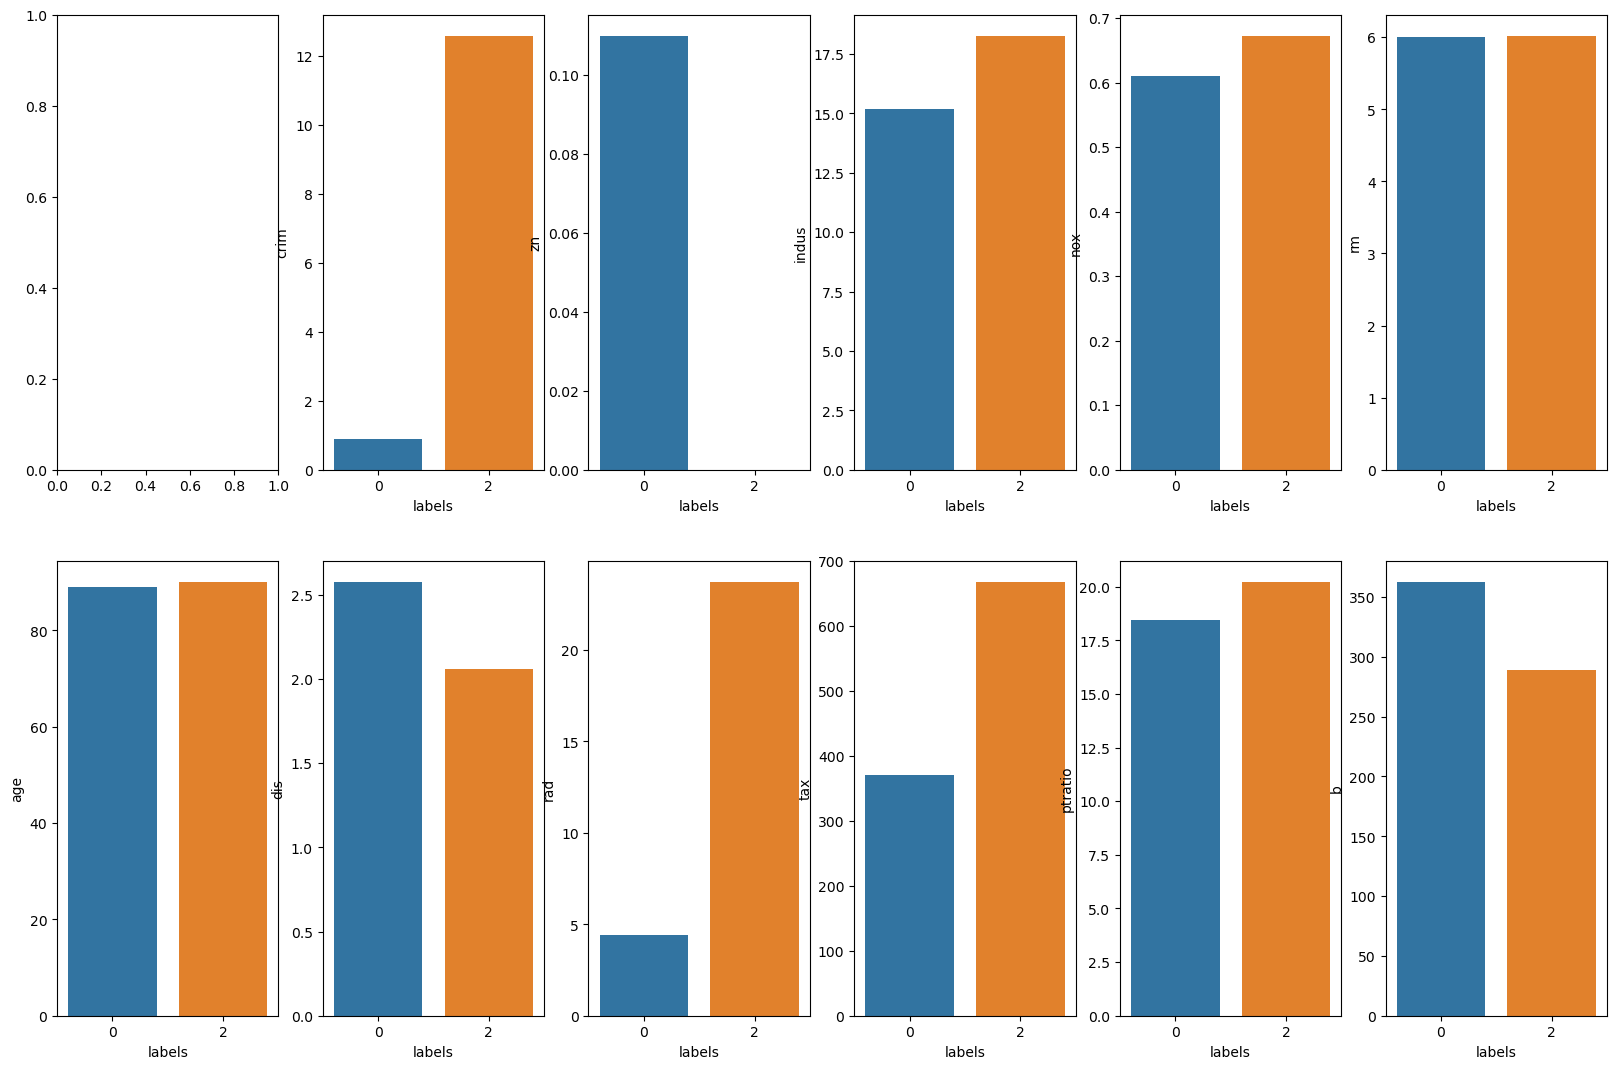

In [20]:
#반복문 사용
f,ax = plt.subplots(2,6, figsize=(20,13))

for i in range(1,12):
    sns.barplot(data = group, x='labels', y=group.columns[i], ax=ax[i//6,i%6])

In [21]:
# 결론
# => 범죄율이 낮을수록, 25,000평방피트를 초과 거주지역 비율이 높을수록, 등등 좋은 가격을 나타내는 지역임을 알 수 있음


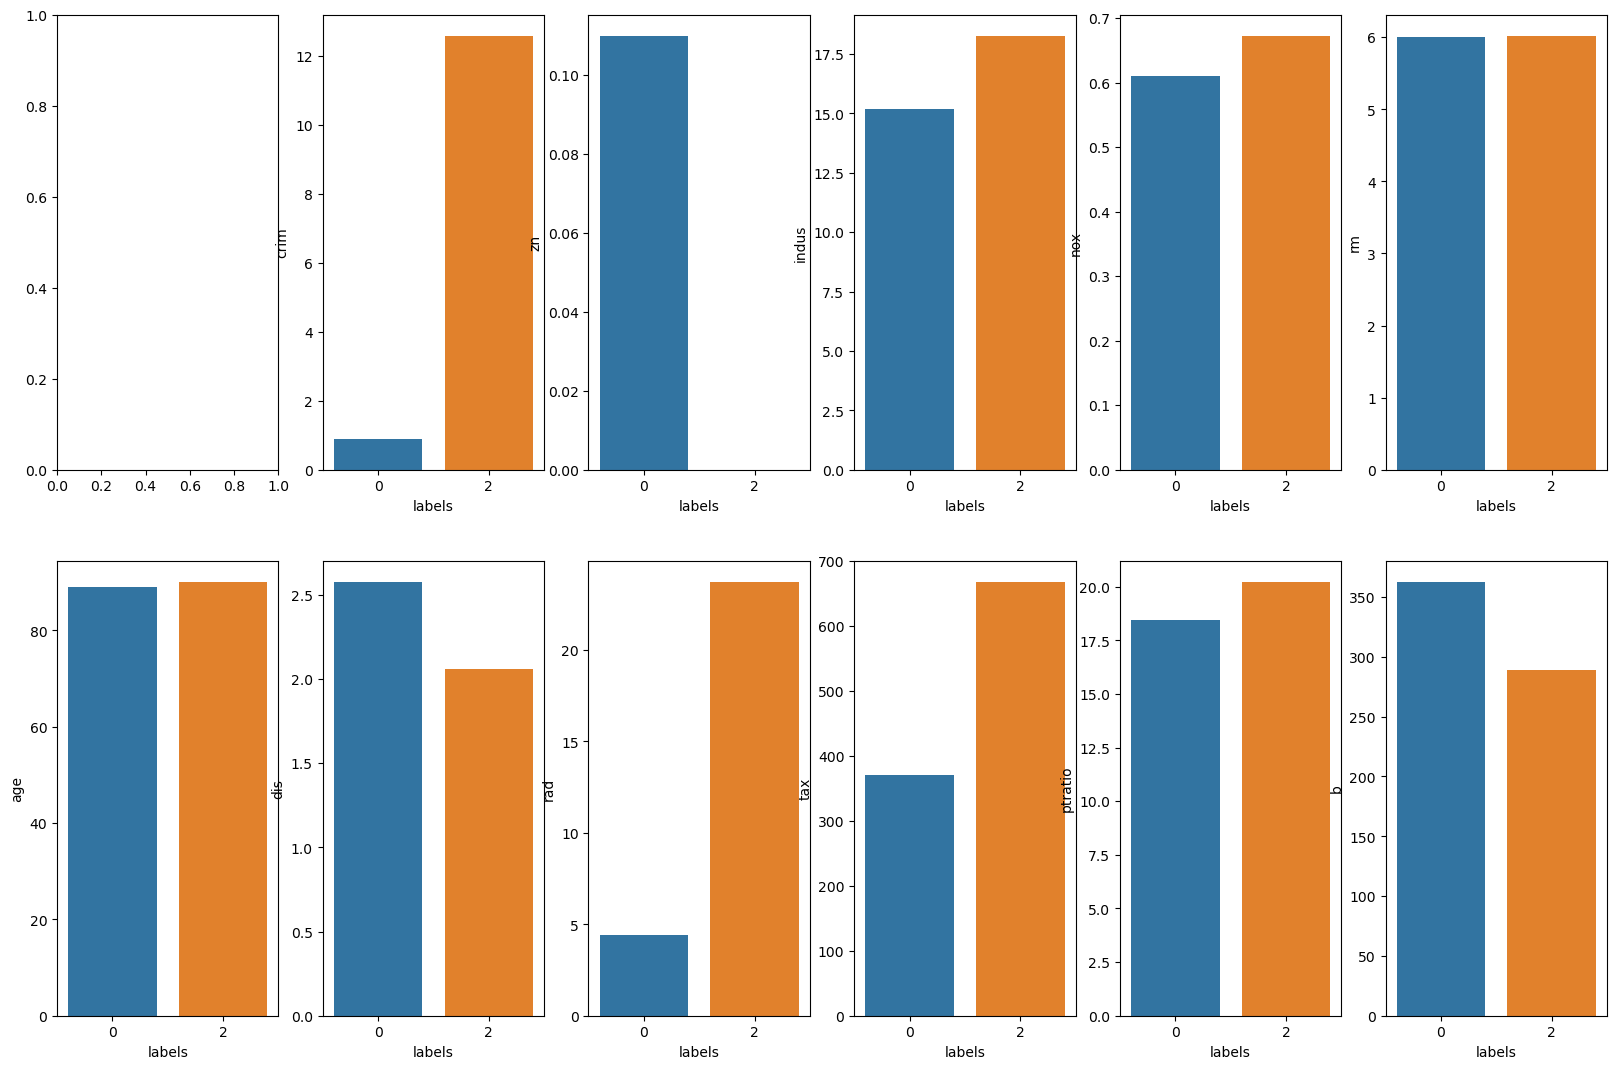

In [22]:
f

In [23]:
ax

array([[<AxesSubplot:>, <AxesSubplot:xlabel='labels', ylabel='crim'>,
        <AxesSubplot:xlabel='labels', ylabel='zn'>,
        <AxesSubplot:xlabel='labels', ylabel='indus'>,
        <AxesSubplot:xlabel='labels', ylabel='nox'>,
        <AxesSubplot:xlabel='labels', ylabel='rm'>],
       [<AxesSubplot:xlabel='labels', ylabel='age'>,
        <AxesSubplot:xlabel='labels', ylabel='dis'>,
        <AxesSubplot:xlabel='labels', ylabel='rad'>,
        <AxesSubplot:xlabel='labels', ylabel='tax'>,
        <AxesSubplot:xlabel='labels', ylabel='ptratio'>,
        <AxesSubplot:xlabel='labels', ylabel='b'>]], dtype=object)